In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns

2025-01-17 06:38:14.620987: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-17 06:38:30.646759: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# Load test data
test_data = np.load("../data2.npy")
test_labels = np.load("../lab2.npy")

# Add channel dimension for grayscale images
test_data = test_data[..., np.newaxis]

# Normalize pixel values
test_data = test_data.astype('float32') / 255.0

# Reshape labels for regression
test_labels = test_labels.reshape(-1, 1)

In [4]:
test_data_resized = tf.image.resize(test_data, (224, 224)).numpy()

2025-01-17 06:39:07.897515: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [13]:
batch_size = 32
test_dataset = tf.data.Dataset.from_tensor_slices((test_data_resized, test_labels))

test_dataset = (
    test_dataset
    .batch(batch_size)
)

In [7]:
# Load the model
custom_objects = {
    'MeanSquaredError': tf.keras.losses.MeanSquaredError
}
model = tf.keras.models.load_model('digit_sum_model_best.h5', custom_objects=custom_objects)

In [8]:
# Predict on validation data
test_predictions = model.predict(test_dataset)

# Convert predictions and true values to numpy arrays
test_predictions = np.squeeze(test_predictions)  # Remove unnecessary dimensions
test_labels_np = np.squeeze(test_labels)  # If needed, ensure y_val is a 1D array

313/313 ━━━━━━━━━━━━━━━━━━━━ 71s 218ms/step


In [14]:
# Calculate accuracy within ±0.5 range
tolerance = 0.5
accurate_predictions = np.abs(test_predictions - test_labels_np) <= tolerance
accuracy = np.mean(accurate_predictions)

print(f"Accuracy within ±{tolerance}: {accuracy * 100:.2f}%")

Accuracy within ±0.5: 19.83%


In [15]:
# Calculate accuracy within ±1 range
tolerance = 1
accurate_predictions = np.abs(test_predictions - test_labels_np) <= tolerance
accuracy = np.mean(accurate_predictions)

print(f"Accuracy within ±{tolerance}: {accuracy * 100:.2f}%")

Accuracy within ±1: 38.36%


In [16]:
# Calculate accuracy within ±2 range
tolerance = 2
accurate_predictions = np.abs(test_predictions - test_labels_np) <= tolerance
accuracy = np.mean(accurate_predictions)

print(f"Accuracy within ±{tolerance}: {accuracy * 100:.2f}%")

Accuracy within ±2: 66.94%


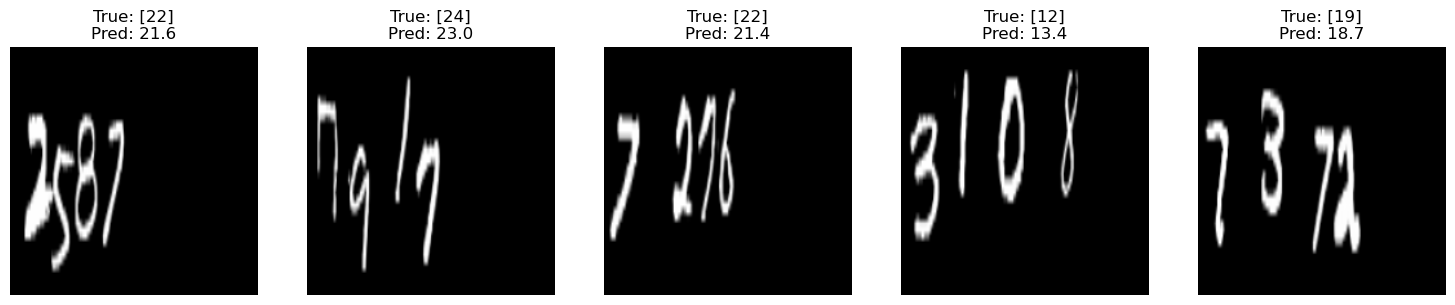

In [12]:
# Randomly select samples
indices = np.random.choice(len(test_data_resized), 5, replace=False)

# Create figure
plt.figure(figsize=(15, 3))

for i, idx in enumerate(indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_data_resized[idx].squeeze(), cmap='gray')
    plt.axis('off')
    pred_value = test_predictions[idx]
    true_value = test_labels[idx] if test_labels is not None else "Unknown"
    plt.title(f'True: {true_value}\nPred: {pred_value:.1f}')

plt.tight_layout()
plt.show()